<center><br> <center><strong style="font-size: 30px;"> ML2.1: DRUG PREDICTION </strong></center>
</center> <br> <center><b style="font-size: 20px;">Prepared By - Subhasish Sinha</b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Instaling & Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Processing**](#Section6)<br>
  - **5.1** [**Data Pre-Profiling**](#Section51)<br>
  - **5.2** [**Data Cleaning**](#Section52)<br>
  - **5.3** [**Data Post-Profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
**8.** [**Modelling Development & Evaluation**](#Section8)<br>

**9.** [**Conclusion**](#section9)

---
<a name = Section1></a>
# **1. Introduction**
---

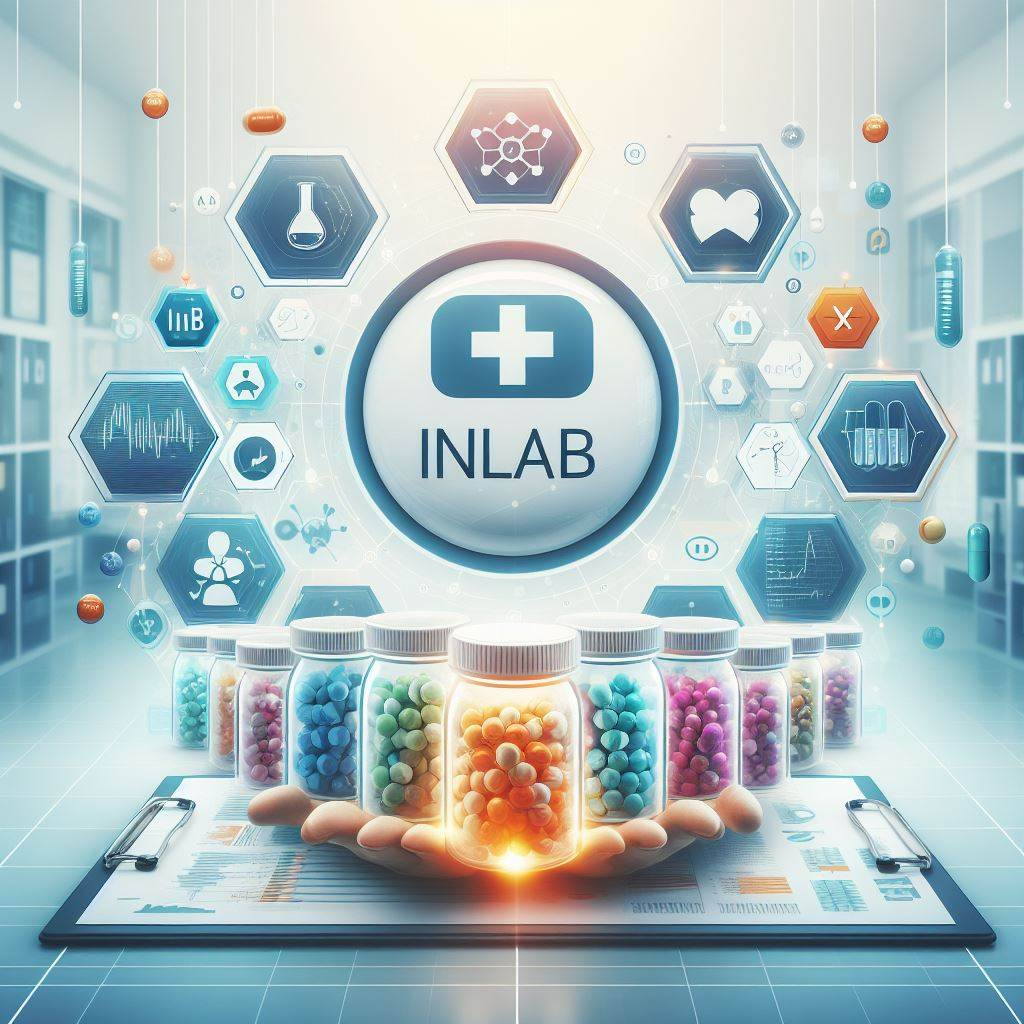

**Company introduction - InLab**

They have a long history of making effective drugs and are the leading producer of antibiotics for bacterial infection.

Their research and development team have recently developed five types of drugs to fight against chronic throat infection.

They want to quickly release the drug in the market so that they could cure people and increase revenue for the company.

Their R&D team made a brief analysis of the chemical composition present in the drug and made a brief report stating that each drug has a different effect according to their health.

The drug which has a higher concentration of chemicals should be given to those groups of people whose health report passes some criteria as suggested by the R&D team.

---
<a name = Section2></a>
# **2. Problem Statement**
---

The R&D group has invited some groups of people to test the drug, but going through each person’s health report might take a lot of time and cause a delay in launching the drug in the market. The current process suffers from the following problems:

Testing phase takes a lot of time and it's done manually because they need to carefully examine each person for the side effects.

Most of the crucial time is being wasted in checking each person’s health report and dispensing specific drugs according to the health metric as suggested by the R&D team.

This process is time-consuming and wastage of resources.

Hence the goal is to create a machine-learning model for pharmaceutical company, InLab, aiming at automating the process of assigning specific drugs for chronic throat infection based on individuals' health reports.

This will help the company to facilitate a quicker drug release to the market by reducing the time taken in the testing phase.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [45]:
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

The Dataset contains the following columns:

|Column Name|Description|
|:--|:--|
Id|Unique Id of the sample
Age|Age of the person
Sex|The sex of the person(M and F)
BP|Blood pressure of the person
Cholesterol|The level of cholesterol in a person's body
Na_to_K|Sodium and potassium ratio
Drug|Drug: Contains 5 classes of drugs encoded as(drug A : 3, drug B: 4, drug C: 2, drug X: 0, drug Y: 1)

In [46]:
# Load the training dataset
train_data_path = 'https://raw.githubusercontent.com/subhasishsinha12/MLProjects/main/Drug%20Prediction/drug_train.csv'
train_data = pd.read_csv(train_data_path)
print("Shape of the Training Data", train_data.shape)
train_data.head()

Shape of the Training Data (160, 7)


,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY


In [47]:
# Load the test dataset
test_data_path = 'https://raw.githubusercontent.com/subhasishsinha12/MLProjects/main/Drug%20Prediction/drug_test.csv'
test_data = pd.read_csv(test_data_path)
print("Shape of the Training Data", test_data.shape)
test_data.head()

Shape of the Training Data (40, 6)


,Id,Age,Sex,BP,Cholesterol,Na_to_K
0,95,36,M,LOW,NORMAL,11.424
1,15,16,F,HIGH,NORMAL,15.516
2,30,18,F,NORMAL,NORMAL,8.750
3,158,59,F,LOW,HIGH,10.444
4,128,47,M,LOW,NORMAL,33.542


<a name = Section41></a>
### **4.1 Data Description**

---
- In this section we will get **information about the data** and see some observations.

In [48]:
train_data.describe()

,Id,Age,Na_to_K
count,160.000000,160.000000,160.000000
mean,99.075000,45.387500,16.194987
std,59.374894,16.101481,7.254689
min,0.000000,15.000000,6.269000
25%,45.500000,32.000000,10.445250
50%,100.500000,46.000000,14.076500
75%,149.500000,58.250000,19.480750
max,199.000000,74.000000,38.247000


**Observations**:
    
Age

    Count: 160 observations, confirming each sample includes age data.

    Mean: The average age is approximately 45.39 years, indicating a middle-aged demographic.

    Min/Max: Ages range from 15 to 74 years, showing a wide diversity in the sample population.

    Quartiles: The 25th percentile is at 32 years, the median (50th percentile) is 46 years, and the 75th percentile is at 58.25 years, which provides insight into the age distribution among the participants.

    Standard Deviation: The value of 16.10 shows variability in the ages of the individuals.

Na_to_K (Sodium to Potassium Ratio)

    Count: 160 observations, ensuring each sample includes this crucial health metric.

    Mean: The average ratio is approximately 16.19, which might be a critical factor in determining the drug classification.

    Min/Max: The ratio ranges from 6.269 to 38.247, indicating significant variability in the biochemical marker among individuals.

    Quartiles: The 25th percentile is at 10.45, the median is 14.08, and the 75th percentile is at 19.48, showing how the ratio distribution skews across the dataset.

    Standard Deviation: A value of 7.25 reflects the spread of the Na_to_K ratio values around the mean.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


In [50]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           40 non-null     int64  
 1   Age          40 non-null     int64  
 2   Sex          40 non-null     object 
 3   BP           40 non-null     object 
 4   Cholesterol  40 non-null     object 
 5   Na_to_K      40 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ KB


<a name = Section51></a>

---
# **5. Data Pre-Processing**
---

In [51]:
# Checking for missing values in the training data before preprocessing
missing_cells_count = train_data.isnull().sum().sum()


# Checking for duplicate rows in the training data before preprocessing
duplicate_rows_count = train_data.duplicated().sum()


# Finding the minimum value of Na_to_K for DrugY in the training data
min_na_to_k_for_drugy = train_data[train_data['Drug'] == 'DrugY']['Na_to_K'].min()

missing_cells_count, duplicate_rows_count, min_na_to_k_for_drugy

(0, 0, 15.015)

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

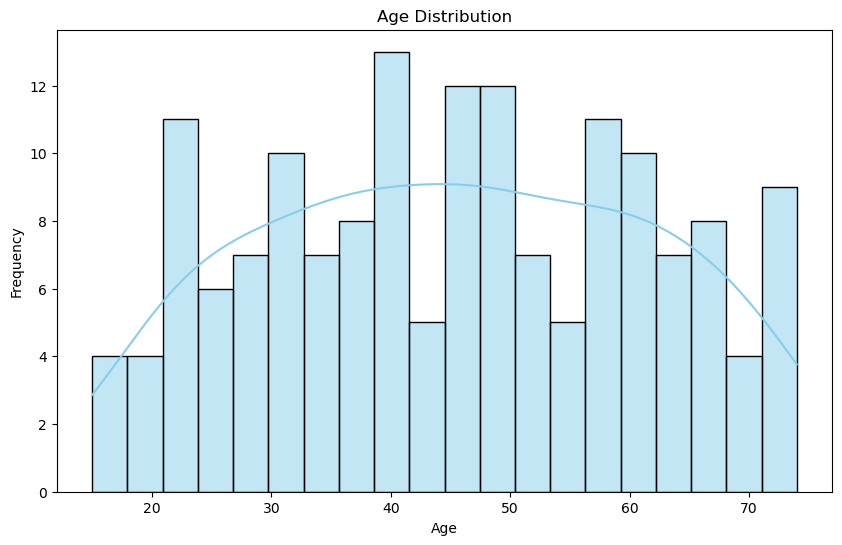

In [26]:
# Distribution of the Age column

plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

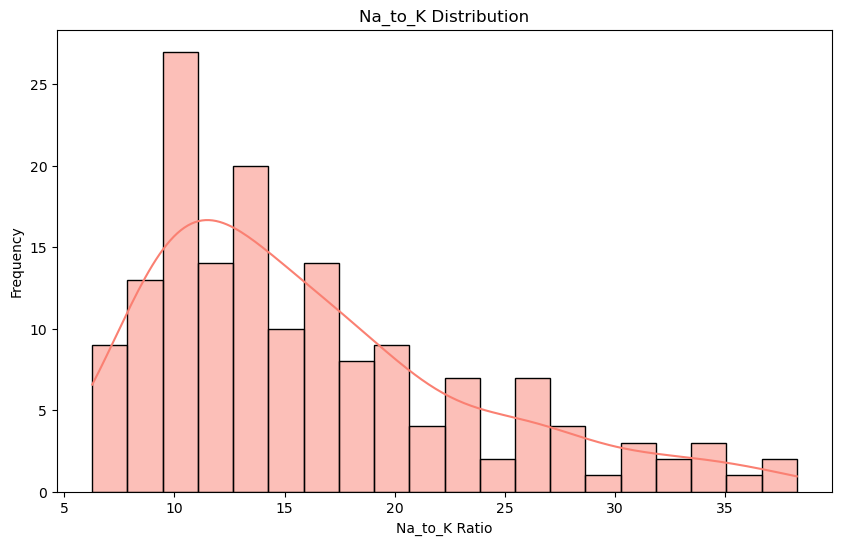

In [27]:
#  Distribution of the Na_to_K ratio.

plt.figure(figsize=(10, 6))
sns.histplot(train_data['Na_to_K'], bins=20, kde=True, color='salmon')
plt.title('Na_to_K Distribution')
plt.xlabel('Na_to_K Ratio')
plt.ylabel('Frequency')
plt.show()

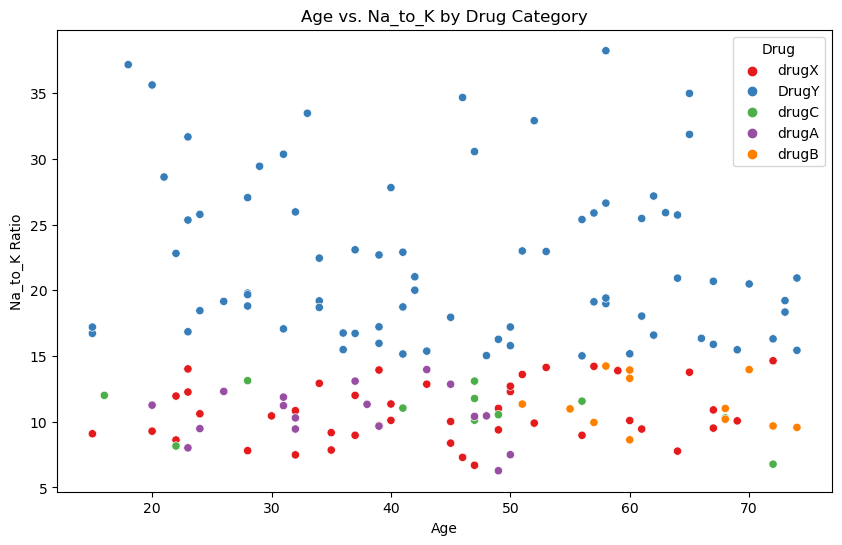

In [28]:
# Age vs. Na_to_K Scatter Plot with Drug Category

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Na_to_K', hue='Drug', data=train_data, palette='Set1')
plt.title('Age vs. Na_to_K by Drug Category')
plt.xlabel('Age')
plt.ylabel('Na_to_K Ratio')
plt.legend(title='Drug')
plt.show()

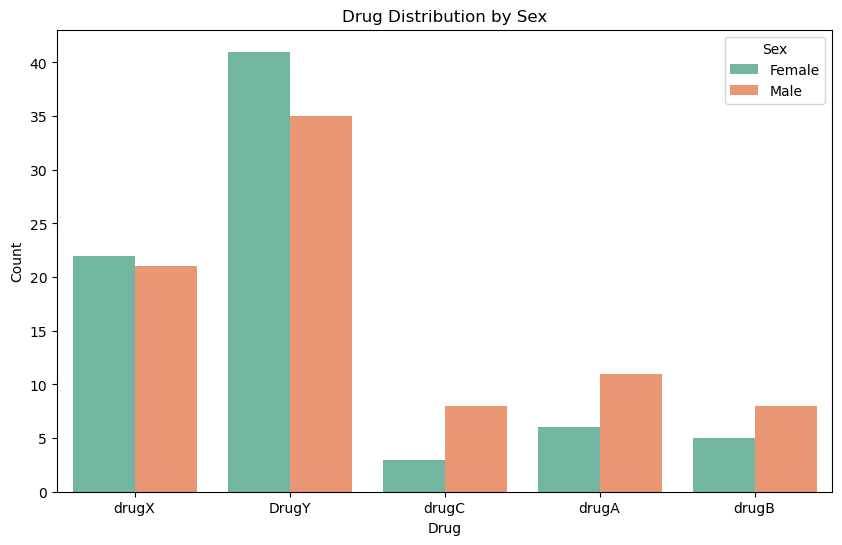

In [29]:
# Drug Distribution by Sex

plt.figure(figsize=(10, 6))
sns.countplot(x='Drug', hue='Sex', data=train_data, palette='Set2')
plt.title('Drug Distribution by Sex')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

<a name = Section7></a>

---
# **7. Data Post-Processing**
---

In [52]:
# Initialize label encoders for each categorical variable to ensure clean encoding
sex_encoder = LabelEncoder()
bp_encoder = LabelEncoder()
cholesterol_encoder = LabelEncoder()
drug_encoder = {'drugX': 0, 'DrugY': 1, 'drugC': 2, 'drugA': 3, 'drugB': 4}


# Encode 'Sex', 'BP', 'Cholesterol' for both datasets
train_data['Sex'] = sex_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = sex_encoder.transform(test_data['Sex'])

train_data['BP'] = bp_encoder.fit_transform(train_data['BP'])
test_data['BP'] = bp_encoder.transform(test_data['BP'])

train_data['Cholesterol'] = cholesterol_encoder.fit_transform(train_data['Cholesterol'])
test_data['Cholesterol'] = cholesterol_encoder.transform(test_data['Cholesterol'])

# Directly encode 'Drug' column for the training dataset
train_data['Drug'] = train_data['Drug'].map(drug_encoder)

# Drop the 'Id' column from both datasets as it's not relevant for model training
train_data.drop('Id', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace=True)

train_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,32,0,1,1,10.840,0
1,52,1,2,0,9.894,0
2,39,0,2,1,9.709,0
3,33,0,1,0,33.486,1
4,34,1,2,0,22.456,1
...,...,...,...,...,...,...
155,22,1,2,0,11.953,0
156,50,0,2,0,12.703,0
157,29,0,0,0,29.450,1
158,67,0,2,0,15.891,1


In [53]:
train_data.head(), test_data.head()

(   Age  Sex  BP  Cholesterol  Na_to_K  Drug
 0   32    0   1            1   10.840     0
 1   52    1   2            0    9.894     0
 2   39    0   2            1    9.709     0
 3   33    0   1            0   33.486     1
 4   34    1   2            0   22.456     1,
    Age  Sex  BP  Cholesterol  Na_to_K
 0   36    1   1            1   11.424
 1   16    0   0            1   15.516
 2   18    0   2            1    8.750
 3   59    0   1            0   10.444
 4   47    1   1            1   33.542)

In [54]:
# Splitting the data into features and target variable
X = train_data.drop('Drug', axis=1)
y = train_data['Drug']

# Split the training data into training and validation sets to evaluate model performance
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

In [55]:
# Initialize the models
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Cross-validation scores for Random Forest and Gradient Boosting
rf_cv_score = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy').mean()
gb_cv_score = cross_val_score(gradient_boosting, X_train, y_train, cv=5, scoring='accuracy').mean()

rf_cv_score, gb_cv_score


(0.9735177865612649, 0.9648221343873518)

In [56]:
# Hyperparameter tuning setup
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50},
 0.99375)

In [59]:
random_forest_best = RandomForestClassifier(**best_params)

# Training the Random Forest Classifier on the full training set
random_forest_best.fit(X_train, y_train)

# Predicting on the validation set
y_pred = random_forest_best.predict(X_val)

# Evaluating the model's performance
accuracy = accuracy_score(y_val, y_pred)
accuracy

1.0

In [61]:
# Extracting feature importances
feature_importances = random_forest_best.feature_importances_

# Creating a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df

,Feature,Importance
4,Na_to_K,0.556222
2,BP,0.223419
0,Age,0.154751
3,Cholesterol,0.046864
1,Sex,0.018745


In [62]:
# Model Prediction on Test Data

X_test = test_data

# Making predictions
test_predictions = random_forest_best.predict(X_test)
test_predictions

array([0, 1, 0, 2, 1, 1, 1, 0, 3, 0, 3, 0, 1, 3, 4, 1, 4, 0, 0, 1, 4, 0,
       0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 3, 1, 0, 3, 1, 3], dtype=int64)

In [63]:
# Submission of Model Prediction

test_submission = pd.read_csv(test_data_path)

# Creating a DataFrame for submission
test_id = test_submission['Id']
submission_rf = pd.DataFrame({
    'ID': test_id,
    'Drug': test_predictions
})

# Exporting the submission file to CSV
submission_rf.to_csv('submission_drug_prediction.csv', index=False,header= False)

<a name = Section8></a>

---
# **9. Conclusion**
---

### *Feature Importance and Insights* ###

The feature importance analysis underscored the Na_to_K ratio as the most critical factor in determining drug class, followed by BP and Age, aligning with expectations given the medical relevance of these metrics.

### *Predictions and Deployment* ###

The trained Random Forest model was used to predict drug classes on a new set of individuals, demonstrating the model's applicability in automating drug assignments.

A submission file was prepared, pairing each individual's Id with the predicted drug class, ready for practical deployment in InLab's operations.

### *Conclusion and Recommendations* ###

The project successfully developed a machine learning model capable of automating the drug classification process, potentially revolutionizing how InLab assigns drugs to patients.

Future recommendations include validating the model on a more extensive or external dataset to ensure its generalizability and exploring additional models or feature engineering techniques to further refine predictions.

Continuous monitoring and updating of the model are advised to adapt to new data and evolving drug efficacy profiles.